<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/Aryan/blob/main/Untitled21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import numpy as np
import math
from scipy import ndimage
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time

shape of image:  (356, 493)


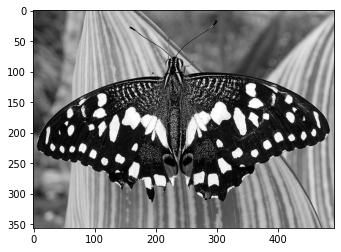

In [199]:
begin = time.time()
image = cv2.imread('/content/butterfly1.jpeg', 2)
image1 = cv2.imread('/content/butterfly1.jpeg')
image = image/255
print('shape of image: ',image.shape)
plt.imshow(image, cmap = 'gray')
plt.show()

In [200]:
def Sigma(n,k,f):
    list = []
    for i in range(n):
        sigma = f*(k**i)
        list.append(sigma)
    print(list)
    h = [round(x*6) for x in list]
    for x in range(len(h)):
        if h[x]%2 == 0:
            h[x] = h[x]+1
    print(h)        
    return list,h

In [201]:
def LoG(k,sig,n,h):
    list = []
    for num in range(n):
        matrix = np.zeros((h[num],h[num]))
        r = -(math.floor(h[num]/2))
        r = int(r)
        c = math.floor(h[num]/2)
        c = int(c)
        for x in range(r,c+1):
            for y in range(r,c+1):
                matrix[x+r,y+c] = (-1/(math.pi*(sig[num]**2)))*(1-(((x**2)+(y**2))/(2*(sig[num]**2))))*np.exp(-((x**2)+(y**2))/(2*(sig[num]**2)))
        list.append(matrix)
    return list

In [202]:
r = image.shape[0]
c = image.shape[1]

Inefficient approach:

In [203]:
def convolution(image,LoG,n):
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

In [210]:
def maximaDetection(image,convmatrix,sig,num,threshold):
    begintime = time.time()
    landmarks = []
    minima_count = 0
    for n in range(num):
        list_blobs = []
        loc = int(math.sqrt(2)*sig[n])
        for row in range(r):
         for col in range(c):
             check_minima = 'minima'
             for l in range(-1,2):
              for x in range(-1,2):
                  for y in range(-1,2):
                      if row+x >= 0 and col+y >= 0 and row+x < r and col+y < c and n+l >= 0 and n+l < num:
                         if convmatrix[n][row,col] > threshold:
                            if convmatrix[n][row,col] < convmatrix[n+l][row+x,col+y]: check_minima = 'not minima'   
                         else: check_minima = 'not minima'
             if check_minima == 'minima':
              if row-loc > 0 and col-loc > 0 and row-loc < r and col-loc < c:
                        list_blobs.append([row,col])
                        cv2.circle(image, (col, row), loc, (255,0,0), 1)
        print('minima count in scale space', n,': ',len(list_blobs))
        minima_count = minima_count + len(list_blobs)
        landmarks.append(list_blobs)
    endtime = time.time()
    print('maxima reduction process duration: ', endtime-begintime)
    print('minimas count: ', minima_count)
    return image,landmarks

[0.7071067811865475, 0.8768124086713188, 1.0872473867524355, 1.3481867595730197, 1.6717515818705444, 2.072971961519475, 2.5704852322841494, 3.1874016880323452, 3.952378093160108, 4.900948835518533, 6.077176556042981, 7.535698929493298, 9.344266672571688, 11.586890673988895, 14.367744435746229]
[5, 5, 7, 9, 11, 13, 15, 19, 25, 29, 37, 45, 57, 71, 87]


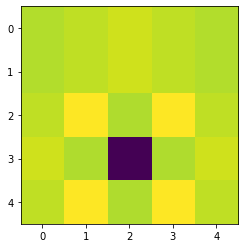

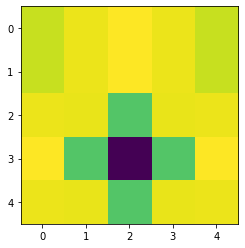

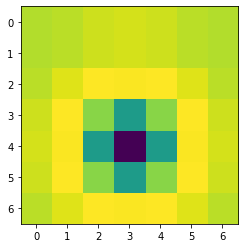

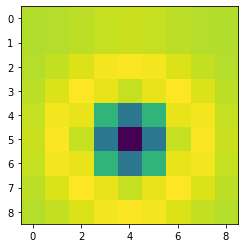

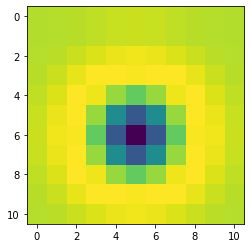

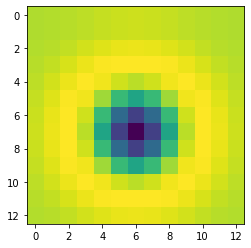

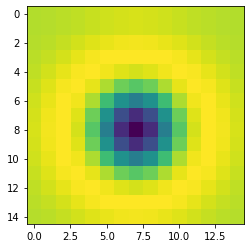

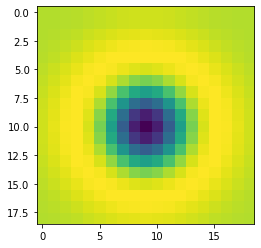

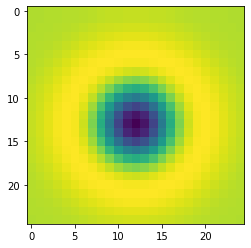

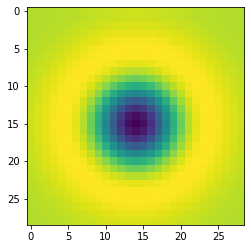

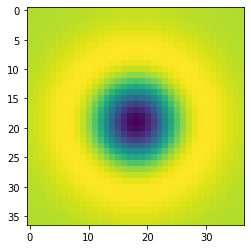

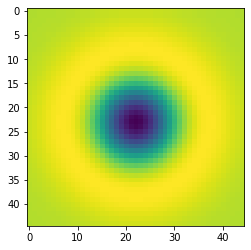

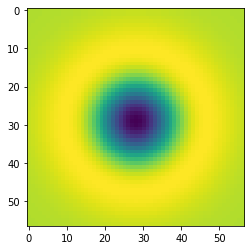

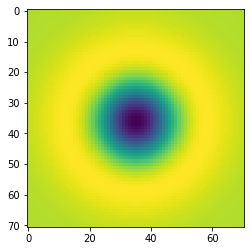

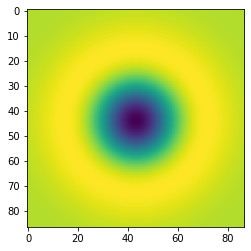

(356, 493)
(356, 493)
convolution time:  8.547146558761597


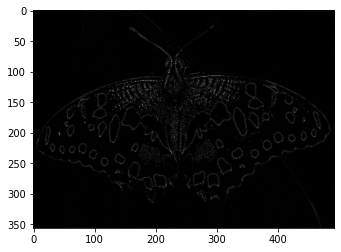

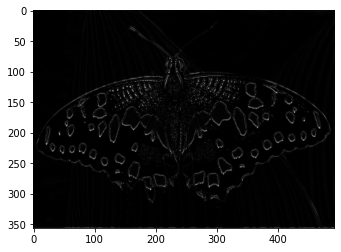

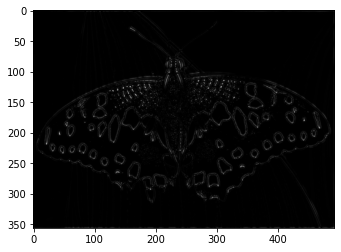

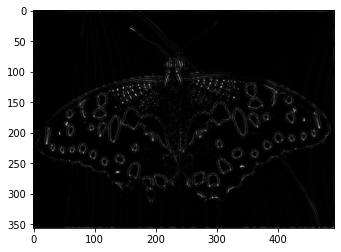

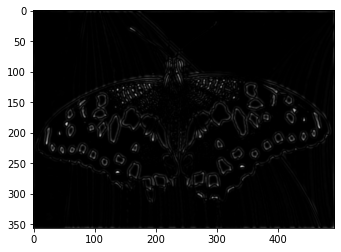

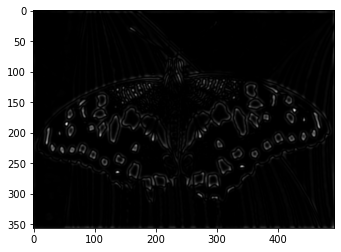

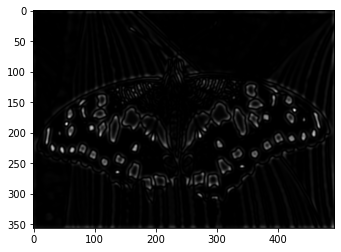

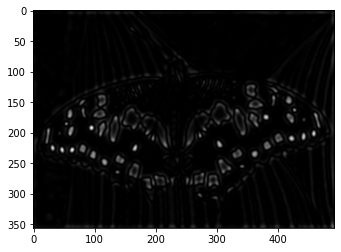

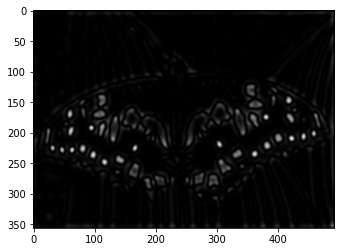

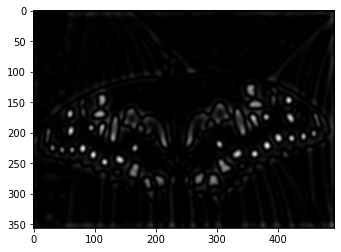

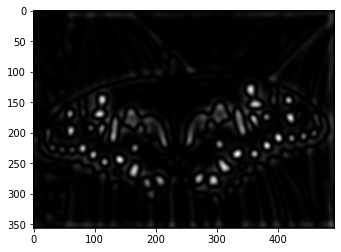

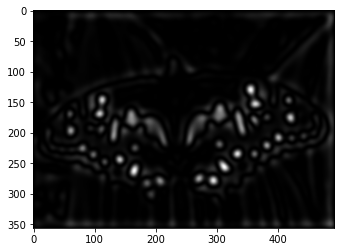

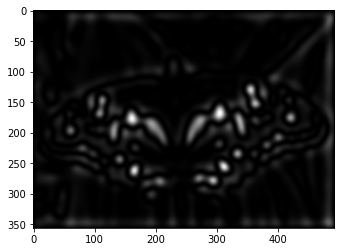

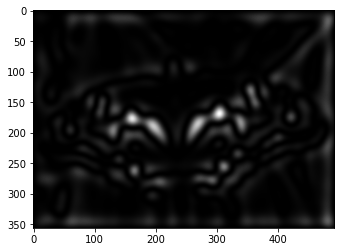

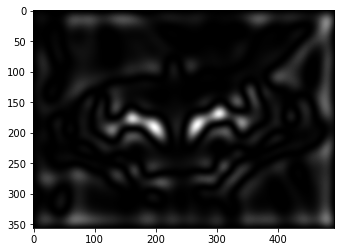

minima count in scale space 0 :  2283
minima count in scale space 1 :  884
minima count in scale space 2 :  292
minima count in scale space 3 :  390
minima count in scale space 4 :  204
minima count in scale space 5 :  115
minima count in scale space 6 :  275
minima count in scale space 7 :  163
minima count in scale space 8 :  98
minima count in scale space 9 :  128
minima count in scale space 10 :  70
minima count in scale space 11 :  46
minima count in scale space 12 :  32
minima count in scale space 13 :  23
minima count in scale space 14 :  19
maxima reduction process duration:  77.38002920150757
minimas count:  5022


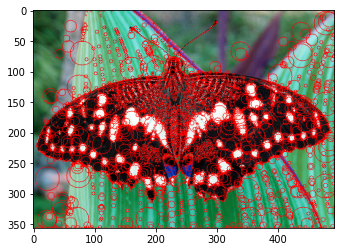

Time taken for the complete program =  300.56193447113037 sec


In [211]:
num = 15
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

Efficient approach:

[0.7071067811865475]
[5]


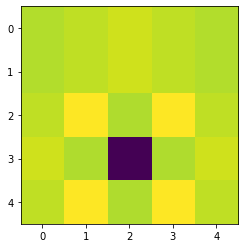

(356, 493)
convolution time:  0.010166168212890625


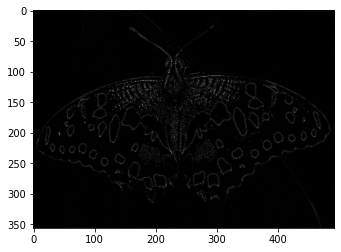

minima count in scale space 0 :  3397
maxima reduction process duration:  3.8365747928619385
minimas count:  3397


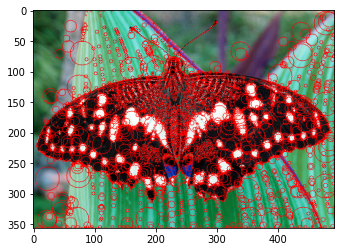

Time taken for the complete program =  327.9391601085663 sec


In [212]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**1) #-----> values changed in each cell below which indicates the downsampling 
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**1 #--> Upsampling the image after applying the filter
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')    

[0.7071067811865475]
[5]


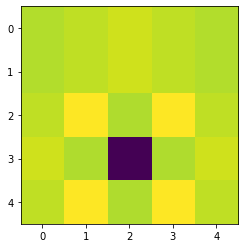

(356, 493)
(356, 493)
convolution time:  0.0075931549072265625


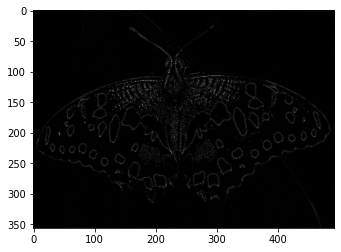

minima count in scale space 0 :  3397
maxima reduction process duration:  3.2443182468414307
minimas count:  3397


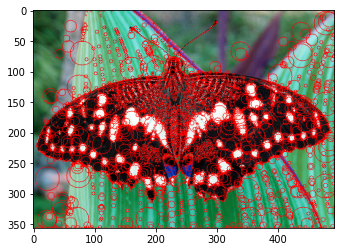

Time taken for the complete program =  338.23270654678345 sec


In [213]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**2)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**2
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


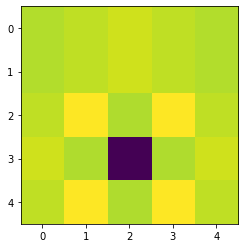

(356, 493)
(356, 493)
convolution time:  0.012938499450683594


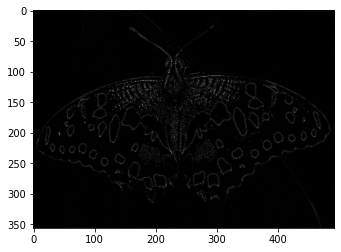

minima count in scale space 0 :  3397
maxima reduction process duration:  3.2165751457214355
minimas count:  3397


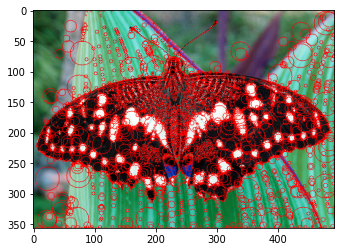

Time taken for the complete program =  346.0918390750885 sec


In [214]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**3)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**3
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


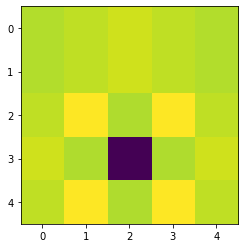

(356, 493)
(356, 493)
convolution time:  0.016562461853027344


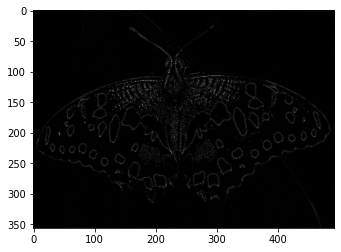

maxima reduction process duration:  3.213107109069824
minimas count:  3397


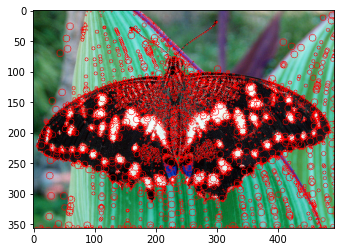

Time taken for the complete program =  1254.1916563510895 sec


In [187]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**4)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**4
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


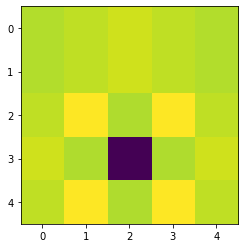

(356, 493)
(356, 493)
convolution time:  0.01560831069946289


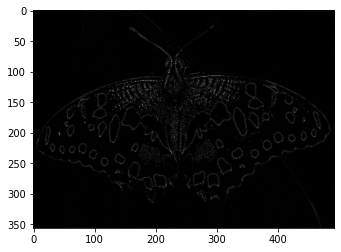

maxima reduction process duration:  3.7586262226104736
minimas count:  3397


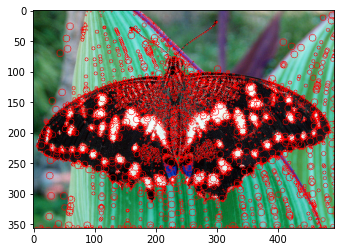

Time taken for the complete program =  1264.0883944034576 sec


In [188]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**5)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**5
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


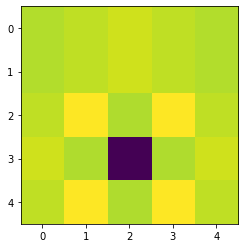

(356, 493)
(356, 493)
convolution time:  0.012802839279174805


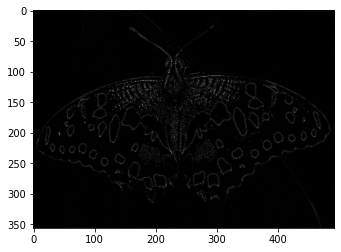

maxima reduction process duration:  6.063291788101196
minimas count:  3397


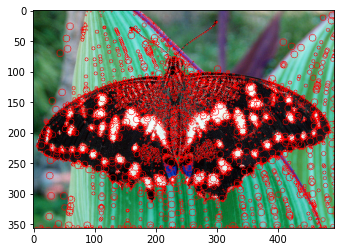

Time taken for the complete program =  1273.0242395401 sec


In [189]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**6)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**6
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)
for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


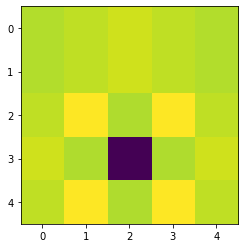

(356, 493)
(356, 493)
convolution time:  0.018884897232055664


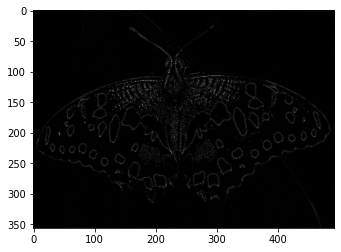

maxima reduction process duration:  3.3507983684539795
minimas count:  3397


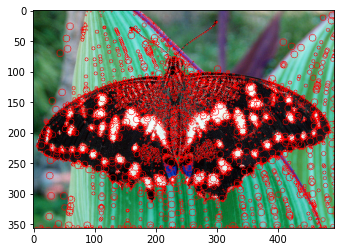

Time taken for the complete program =  1283.0105593204498 sec


In [190]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**7)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**7
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


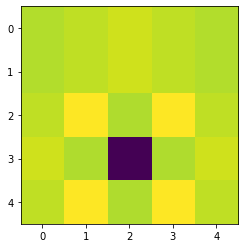

(356, 493)
(356, 493)
convolution time:  0.03717851638793945


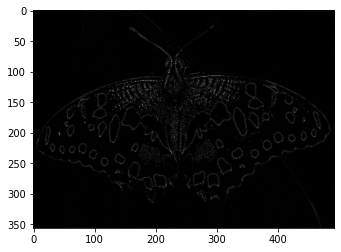

maxima reduction process duration:  3.449164628982544
minimas count:  3397


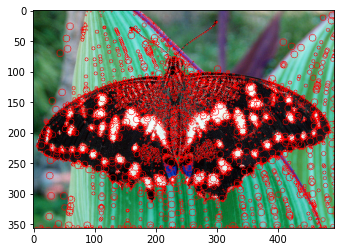

Time taken for the complete program =  1289.3625056743622 sec


In [191]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**8)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**8
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


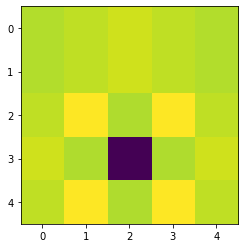

(356, 493)
(356, 493)
convolution time:  0.049378156661987305


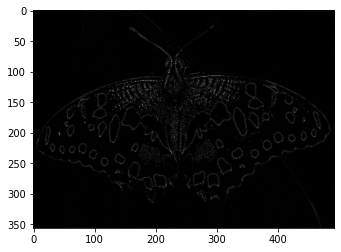

maxima reduction process duration:  3.3404641151428223
minimas count:  3397


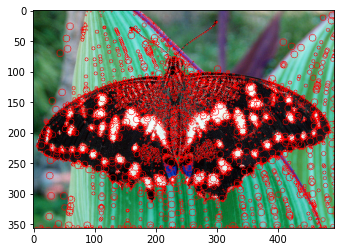

Time taken for the complete program =  1294.0746371746063 sec


In [192]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**9)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**9
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')

[0.7071067811865475]
[5]


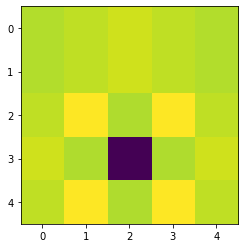

(356, 493)
(356, 493)
convolution time:  0.0589747428894043


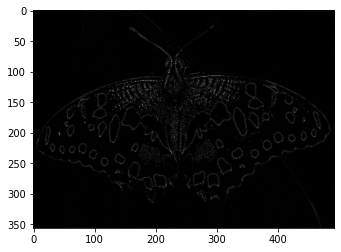

maxima reduction process duration:  0.11303901672363281
minimas count:  7


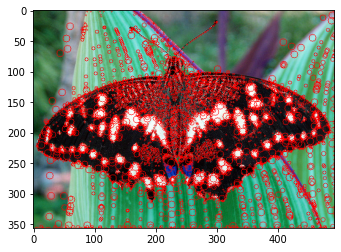

Time taken for the complete program =  1528.643716096878 sec


In [197]:
def convolution(image,LoG,n):
    k = 1.24
    rate = 1/(k**10)
    print(image.shape)
    img = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    starttime = time.time()
    convlist = []
    for num in range(n): 
        convarr = np.zeros((r,c))
        convarr = ndimage.convolve(image,LoG[num],mode = 'constant')
        rate = k**10
        out = cv2.resize(image,None, fx=rate, fy=rate, interpolation=cv2.INTER_LINEAR)
        convlist.append(convarr)
    stoptime = time.time()
    print('convolution time: ', stoptime-starttime)
    return convlist

num = 1
k = 1.24
f = 1/math.sqrt(2) 
thresh = 0.01

sigma,h = Sigma(num,k,f)
Log = LoG(k,sigma,num,h)

for i in range(num):
    plt.imshow(Log[i])
    plt.show()
convmatrix = convolution(image,Log,num)
for i in range(num):
    convmatrix[i] = np.square(convmatrix[i])
    plt.imshow(convmatrix[i],cmap="gray")
    plt.show()
   
image1,landmarks = maximaDetection(image1,convmatrix,sigma,num,thresh)
plt.imshow(image1)
plt.show()
print('Time taken for the complete program = ', time.time() - begin, 'sec')